**The objective of this analysis was simply to explore an take some interesting insights from the Nobel Prize winners history.**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nobel = pd.read_csv('/content/drive/MyDrive/csv_data_files/complete.csv')
nobel.head(n = 6)

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
0,2001,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/3,10000000,12295082,2001-10-10,received,for their analyses of markets with asymmetric ...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Stanford University, Stanford, CA, USA",NaN,NaN,NaN
1,1975,Physics,The Nobel Prize in Physics,1,1/3,630000,3404179,1975-10-17,received,for the discovery of the connection between co...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Niels Bohr Institute, Copenhagen, Denmark",NaN,NaN,NaN
2,2004,Chemistry,The Nobel Prize in Chemistry,1,1/3,10000000,11762861,2004-10-06,received,for the discovery of ubiquitin-mediated protei...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Technion - Israel Institute of Technology, Hai...",NaN,NaN,NaN
3,1982,Chemistry,The Nobel Prize in Chemistry,1,1,1150000,3102518,1982-10-18,received,for his development of crystallographic electr...,...,NaN,NaN,NaN,Individual,NaN,NaN,"MRC Laboratory of Molecular Biology, Cambridge...",NaN,NaN,NaN
4,1979,Physics,The Nobel Prize in Physics,2,1/3,800000,2988048,1979-10-15,received,for their contributions to the theory of the u...,...,NaN,NaN,NaN,Individual,NaN,NaN,"International Centre for Theoretical Physics, ...","Imperial College, London, United Kingdom",NaN,NaN
5,2019,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,1,1/3,9000000,9000000,2019-10-14,received,for their experimental approach to alleviating...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Massachusetts Institute of Technology (MIT), C...",NaN,NaN,NaN


In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

1 - Which sex and which country is the most commonly represented?

In [4]:
display(nobel['gender'].value_counts())

male      869
female     54
Name: gender, dtype: int64

In [5]:
nobel['birth_country'].value_counts().head(n = 10)

USA                274
United Kingdom      87
Germany             77
France              53
Sweden              29
Japan               27
Canada              20
Switzerland         19
the Netherlands     18
Russia              17
Name: birth_country, dtype: int64

In [16]:
# Let's create a plot of the most represented countries
plot_data = nobel.groupby('birth_country', as_index = False).agg({'gender':'count'}).sort_values('gender',ascending = False).head(10)
plot_data.rename(columns = {'gender':'n'}, inplace = True)

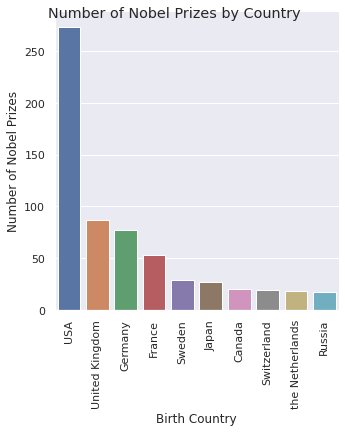

In [59]:
sns.set()
ax = sns.catplot(x = 'birth_country', y = 'n',
                 data = plot_data,
                 kind = 'bar')

ax.set_xticklabels(rotation = 90)
ax.fig.suptitle('Number of Nobel Prizes by Country')
ax.set(ylabel = 'Number of Nobel Prizes',
       xlabel = 'Birth Country')

Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?

In [26]:
# create two variables: decade and a boolean varible indicating whether the laureate was from EUA
nobel['usa_born_winner'] = nobel['birth_country'] == 'USA'
nobel['decade'] = nobel['awardYear'].apply(lambda x: np.floor(x/10)*10)

nobel['decade'] = nobel['decade'].astype('int')

In [27]:
prop_usa_winners = nobel.groupby('decade', as_index = False)['usa_born_winner'].mean()
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


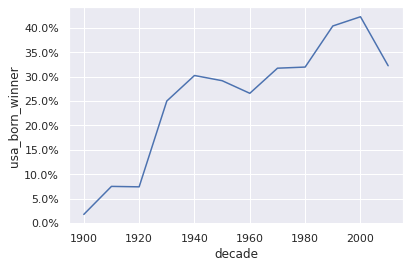

In [60]:
import matplotlib.ticker as mtick

ax = sns.lineplot(x = 'decade', y = 'usa_born_winner',
                  data = prop_usa_winners)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are men. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?

In [29]:
nobel['female_winner'] = nobel['gender'] == 'female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index = False)['female_winner'].mean()
prop_female_winners

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Peace,0.071429
3,1900,Physics,0.076923
4,1900,Physiology or Medicine,0.000000
...,...,...,...
61,2010,Economic Sciences,0.050000
62,2010,Literature,0.300000
63,2010,Peace,0.357143
64,2010,Physics,0.038462


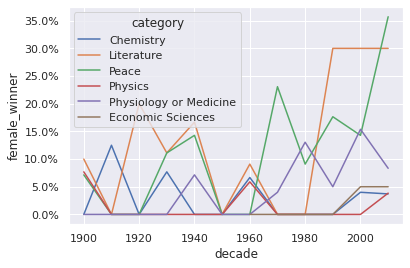

In [30]:
sns.set()

ax = sns.lineplot(x = 'decade', y = 'female_winner',
                  data = prop_female_winners,
                  hue = 'category')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

Let's verify which are the categories women most won

In [53]:
female_df = nobel[nobel['gender'] == 'female']

In [54]:
female_category = female_df.groupby('category', as_index = False).agg({'id':'count'}).sort_values('id',ascending = False)
female_category.rename(columns = {'id':'n'}, inplace = True)

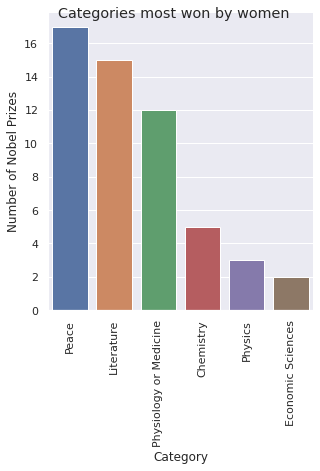

In [58]:
ax = sns.catplot(x = 'category', y = 'n',
               data = female_category,
               kind = 'bar')
ax.set_xticklabels(rotation = 90)
ax.fig.suptitle('Categories most won by women')
ax.set(ylabel = 'Number of Nobel Prizes',
       xlabel = 'Category')

2 - Who was the first woman to receive a Nobel Prize? And in what category?

In [31]:
female = nobel.loc[nobel['gender'] == 'female', ['awardYear','fullName', 'category']]
display(female.nsmallest(1, 'awardYear'))

,awardYear,fullName,category
566,1903,"Marie Curie, née Sklodowska",Physics


3 - Few have gotten a Nobel Prize more than once. Who are these lucky few?

In [32]:
more_than_once = nobel.groupby('fullName').filter(lambda x: len(x) >= 2)
more_than_once['fullName'].value_counts()

Frederick Sanger               2
John Bardeen                   2
Linus Carl Pauling             2
Marie Curie, née Sklodowska    2
Name: fullName, dtype: int64

4 - How old are the winners generally when you get the prize?

In [33]:
#There are some dates with mistakes. Let's fix that!
list_date_errors = []

for date in nobel['birth_date']:
  if str(date)[5:10] == '00-00':
    list_date_errors.append(date)

print(list_date_errors)

['1943-00-00', '1898-00-00', '1993-00-00', '1955-00-00', '1959-00-00', '1952-00-00']


In [34]:
for date in list_date_errors:
  nobel.loc[nobel['birth_date'] == date, 'birth_date'] = np.nan

In [35]:
# calculate the variable age
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])
nobel['age'] = nobel['awardYear'] - nobel['birth_date'].dt.year

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


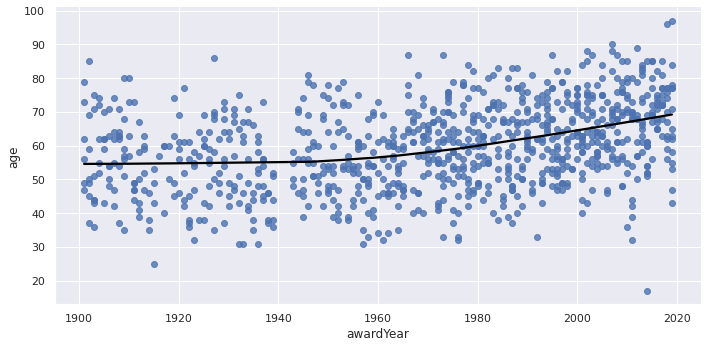

In [36]:
sns.lmplot(x = 'awardYear', y = 'age',
           data = nobel, lowess=True, aspect=2,line_kws={'color' : 'black'})

Let's look at age trends within different prize categories.

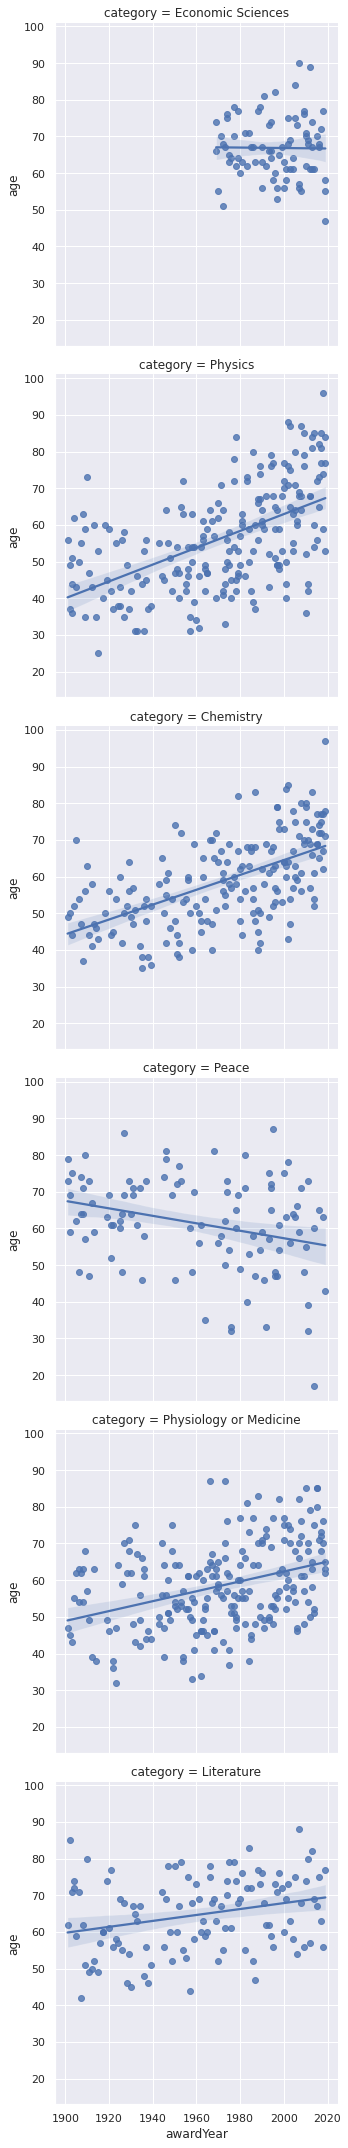

In [37]:
sns.lmplot(x = 'awardYear', y = 'age',
           data = nobel,
           row = 'category')

5 - Who are the oldest and youngest people ever to have won a Nobel Prize?

In [38]:
youngest = nobel.nsmallest(n = 1, columns = 'age')
youngest[['awardYear','fullName', 'category', 'age']]

,awardYear,fullName,category,age
562,2014,Malala Yousafzai,Peace,17.0


In [39]:
oldest = nobel.nlargest(n = 1, columns = 'age')
oldest[['awardYear','fullName', 'category', 'age']]

,awardYear,fullName,category,age
456,2019,John B. Goodenough,Chemistry,97.0
